In [1]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#read in
auth_data = pd.read_csv("auth_sample")
auth_data = auth_data.rename(columns={'?': 'authentication_type', '?.1': 'logon_type', '729834': 'time', 'U9916@DOM1': 'source_user@domain', 'U9916@DOM1.1': 'destination_user@domain', 'C20906': 'source_computer', 'C457': 'destination_computer', 'TGS': 'authentication_orientation', 'Success': 'success_failure'})
auth_data.head()

,time,source_user@domain,destination_user@domain,source_computer,destination_computer,authentication_type,logon_type,authentication_orientation,success_failure
0,2230093,C599$@DOM1,C599$@DOM1,C1065,C1065,?,Network,LogOff,Success
1,3919649,U9008@DOM1,U9008@DOM1,C19145,C8799,?,?,TGS,Success
2,2941099,U6161@DOM1,U6161@DOM1,C14074,C2106,Kerberos,Network,LogOn,Success
3,628166,U5276@DOM1,C217$@DOM1,C217,C217,?,?,AuthMap,Success
4,2442601,U53@DOM1,U53@DOM1,C3037,C3037,?,?,TGT,Success


In [3]:
#drop rows that contain ?
data = auth_data[auth_data.authentication_type != '?']
df = data[data.logon_type != '?']
df.head()

,time,source_user@domain,destination_user@domain,source_computer,destination_computer,authentication_type,logon_type,authentication_orientation,success_failure
2,2941099,U6161@DOM1,U6161@DOM1,C14074,C2106,Kerberos,Network,LogOn,Success
6,3031521,C2043$@DOM1,C2043$@DOM1,C2043,C586,Kerberos,Network,LogOn,Success
7,1345913,C12371$@DOM1,C12371$@DOM1,C12371,C586,Kerberos,Network,LogOn,Success
9,4623535,U7694@DOM1,U7694@DOM1,C16770,C585,Kerberos,Network,LogOn,Success
17,4710726,C5275$@DOM1,C5275$@DOM1,C5276,C2106,Kerberos,Network,LogOn,Success


In [4]:
#convert non-numerical data to numeric
df.convert_objects(convert_numeric=True)

def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
                    
            df[column] = list(map(convert_to_int, df[column]))
            
    return df

df = handle_non_numerical_data(df)
print(df.head)

/Users/michaeldurst/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


<bound method NDFrame.head of            time  source_user@domain  destination_user@domain  source_computer  \
2       2941099               15651                    16460              307   
6       3031521               12836                    13503            10875   
7       1345913               16272                    17109              112   
9       4623535               11201                    11794            10403   
17      4710726                9165                     9661              299   
22      4383143               12451                    13094             2776   
25      2340056                4551                     4805             5438   
29      4236670                6251                     6577             2830   
30      3507962               10472                    11036             1538   
31      3499147                4797                     5062            10970   
32      4041105               16816                    17680             9431  

In [5]:
#verify
df.head()

,time,source_user@domain,destination_user@domain,source_computer,destination_computer,authentication_type,logon_type,authentication_orientation,success_failure
2,2941099,15651,16460,307,1241,8,3,0,1
6,3031521,12836,13503,10875,4218,8,3,0,1
7,1345913,16272,17109,112,4218,8,3,0,1
9,4623535,11201,11794,10403,4934,8,3,0,1
17,4710726,9165,9661,299,1241,8,3,0,1


In [6]:
corr = df.corr()
corr


,time,source_user@domain,destination_user@domain,source_computer,destination_computer,authentication_type,logon_type,authentication_orientation,success_failure
time,1.000000,-0.006826,-0.004967,-0.000343,-0.010452,-0.068802,0.226654,NaN,-0.029696
source_user@domain,-0.006826,1.000000,0.974926,-0.005619,-0.011901,0.032492,0.001057,NaN,0.006870
destination_user@domain,-0.004967,0.974926,1.000000,-0.001315,-0.014418,0.031849,-0.010460,NaN,0.007104
source_computer,-0.000343,-0.005619,-0.001315,1.000000,0.065244,-0.035184,-0.000333,NaN,-0.000432
destination_computer,-0.010452,-0.011901,-0.014418,0.065244,1.000000,-0.081931,-0.011997,NaN,-0.009306
authentication_type,-0.068802,0.032492,0.031849,-0.035184,-0.081931,1.000000,-0.341822,NaN,0.164218
logon_type,0.226654,0.001057,-0.010460,-0.000333,-0.011997,-0.341822,1.000000,NaN,-0.003167
authentication_orientation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
success_failure,-0.029696,0.006870,0.007104,-0.000432,-0.009306,0.164218,-0.003167,NaN,1.000000


In [12]:
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['source_user@domain', 'destination_user@domain','success_failure']
links


,source_user@domain,destination_user@domain,success_failure
0,A,A,1.000000
1,A,B,0.609666
2,A,C,0.601169
3,A,D,0.966471
4,A,E,0.956973
5,A,F,-0.409401
6,A,G,-0.414220
7,A,H,-0.414977
8,A,I,-0.392023
9,A,J,-0.490587


In [13]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['success_failure'] > 0.7) & (links['source_user@domain'] != links['destination_user@domain']) ]
links_filtered


,source_user@domain,destination_user@domain,success_failure
3,A,D,0.966471
4,A,E,0.956973
14,B,E,0.733195
30,D,A,0.966471
34,D,E,0.958334
40,E,A,0.956973
41,E,B,0.733195
43,E,D,0.958334
56,F,G,0.974888
57,F,H,0.957307


In [14]:
# Build graph
G=nx.from_pandas_dataframe(links_filtered, 'source_user@domain', 'destination_user@domain')


/Users/michaeldurst/anaconda/envs/PythonData/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/michaeldurst/anaconda/envs/PythonData/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/michaeldurst/anaconda/envs/PythonData/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/michaeldurst/anaconda/envs/PythonData/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: U

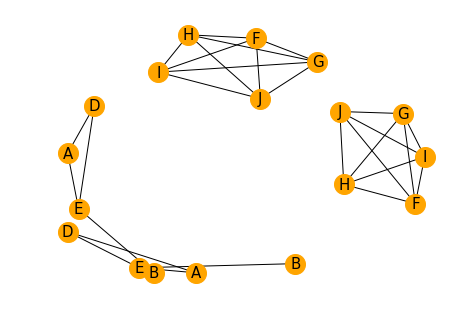

In [16]:
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)
plt.show()

In [26]:
#create target data
target = df["success_failure"]
target_names = ["success", "failure"]

In [44]:
#drop some data
data = df.drop(["success_failure","time", "authentication_type", "logon_type", "authentication_orientation"], axis=1)
feature_names = data.columns
data.head()

,source_user@domain,destination_user@domain,source_computer,destination_computer
2,15651,16460,307,1241
6,12836,13503,10875,4218
7,16272,17109,112,4218
9,11201,11794,10403,4934
17,9165,9661,299,1241


In [45]:
#import train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
#import logisitc regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [48]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
print('Test Acc: %.3f' % classifier.score(X_test, y_test))

Test Acc: 0.993


In [50]:
#import decision tree
from sklearn import tree

In [51]:
#try decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.99434470377019746

In [53]:
#try random forrest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99717235188509878